In [72]:
from rdkit import RDConfig
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem.Descriptors import qed, ExactMolWt, MolLogP
from rdkit.Chem import QED
from SA_Score import sascorer
from NP_Score import npscorer
from NP_Score import npscorer_my
from NP_Score.npscorer_my import processMols
import subprocess
from rdkit import DataStructs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [64]:
file_smiles = "/Volumes/Ubuntu/research_drugs/data/gen_smiles_without_at/10gs/10gs.txt"
file_all_smiles = "/Volumes/Ubuntu/research_drugs/data/gen_smiles_without_at/all_smiles_lig.txt"

In [ ]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = AllChem.GetMorganFingerprint(m1,2)

In [65]:
with open(file_smiles) as fp: 
    smiles = fp.readlines()
with open(file_all_smiles) as fp: 
    smiles_all = fp.readlines()

In [61]:
true_smile = smiles[0]
ligand_smiles = smiles[1:]


In [66]:
m1 = Chem.MolFromSmiles(true_smile)
fp1 = AllChem.GetMorganFingerprint(m1,2)

similarities = []
for smile in ligand_smiles:
    m2 = Chem.MolFromSmiles(smile)
    fp2 = AllChem.GetMorganFingerprint(m2,2)
    similarity = DataStructs.DiceSimilarity(fp1,fp2)
    similarities.append(similarity)

def similarity(smile_true, smiles_others):
    m1 = Chem.MolFromSmiles(smile_true)
    fp1 = AllChem.GetMorganFingerprint(m1,2)
    similarities = []
    for smile in smiles_others:
        m2 = Chem.MolFromSmiles(smile)
        fp2 = AllChem.GetMorganFingerprint(m2,2)
        similarity = DataStructs.DiceSimilarity(fp1,fp2)
        similarities.append(similarity)
    return similarities


In [69]:
sim_random = similarity(true_smile, smiles_all)
len(sim_random)

4831

In [74]:
logP_descriptors = [MolLogP(Chem.MolFromSmiles(smile)) for smile in ligand_smiles]

sa_descriptors = [sascorer.calculateScore(Chem.MolFromSmiles(smile)) for smile in ligand_smiles]

qed_descriptors = [qed(Chem.MolFromSmiles(smile)) for smile in ligand_smiles]
weight = [ExactMolWt(Chem.MolFromSmiles(smile)) for smile in ligand_smiles]


In [78]:
analysis = {'logP': logP_descriptors, 'sa': sa_descriptors, 'qed': qed_descriptors, 'weight': weight}
df = pd.DataFrame(data=analysis)
df.to_csv("analysis.csv")

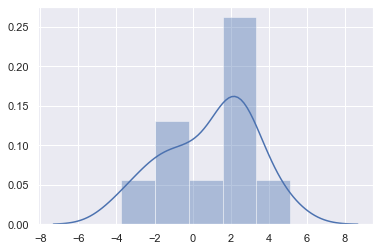

In [75]:
logP_descriptors = np.asarray(logP_descriptors)
sns.set(color_codes=True)
sns.distplot(logP_descriptors);

In [15]:
qed(Chem.MolFromSmiles(true_smile))

0.30769810411626214

In [ ]:
m = Chem.MolFromSmiles(smi)
val = sascorer.calculateScore(m)m = Chem.MolFromSmiles(smi)
val = sascorer.calculateScore(m)

In [24]:
subprocess.call(["python", "npscorer.py", "/Volumes/Ubuntu/research_drugs/data/gen_smiles_without_at/10gs/10gs.txt", ">", "res_1.txt"])

2

In [22]:
npscorer("/Volumes/Ubuntu/research_drugs/data/gen_smiles_without_at/10gs/10gs.txt")

TypeError: 'module' object is not callable